# **Recomendador de filmes - Numpy**

In [1]:
import numpy as np
import pandas as pd

In [2]:
filmes = pd.read_csv('Filmes.csv', sep=',')
ratings = pd.read_csv('Ratings.csv', sep=';')

In [3]:
filmes.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [4]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
filmes.shape

(9737, 4)

In [6]:
ratings.shape

(100836, 3)

In [7]:
df = filmes.merge(ratings, on='movieId')
df.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5


# **Collaborative Filtering - Filtragem colaborativa**

In [8]:
tabela_filmes = pd.pivot_table(df, index='title', columns='userId', values='rating').fillna(0)
tabela_filmes.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import sklearn.metrics.pairwise as pw

In [10]:
rec = pw.cosine_similarity(tabela_filmes)
rec_df = pd.DataFrame(rec, columns=tabela_filmes.index, index=tabela_filmes.index)
rec_df.head()

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
title,,,,,,,,,,,,,,,,,,,,,
'71,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation,0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight,0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot,0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You,0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


# **Por similaridade de cosseno, podemos ver as recomendações (Testável)**

In [11]:
cossine_df = pd.DataFrame(rec_df['Avengers: Age of Ultron'].sort_values(ascending=False))
cossine_df.columns = ['Recomendações']
cossine_df.head(20)

,Recomendações
title,
Avengers: Age of Ultron,1.000000
Captain America: The Winter Soldier,0.781035
Thor: The Dark World,0.777910
Captain America: The First Avenger,0.693643
X-Men: Days of Future Past,0.641329
Thor,0.641065
Guardians of the Galaxy,0.615066
Iron Man 2,0.604507
"Avengers, The",0.598013


## Visualização da frequência de ratings com base nos dados coletados

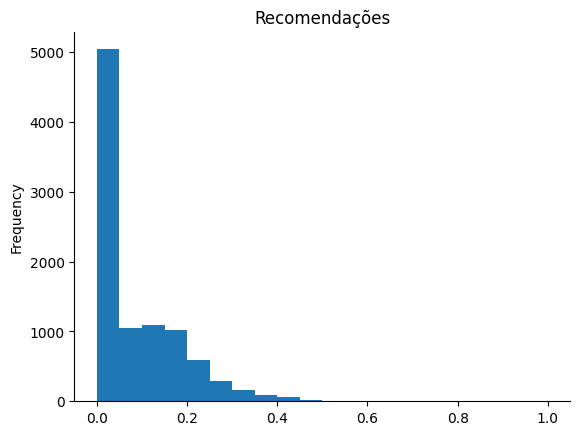

In [12]:
from matplotlib import pyplot as plt
cossine_df['Recomendações'].plot(kind='hist', bins=20, title='Recomendações')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Recomendações Avaliação x Filme

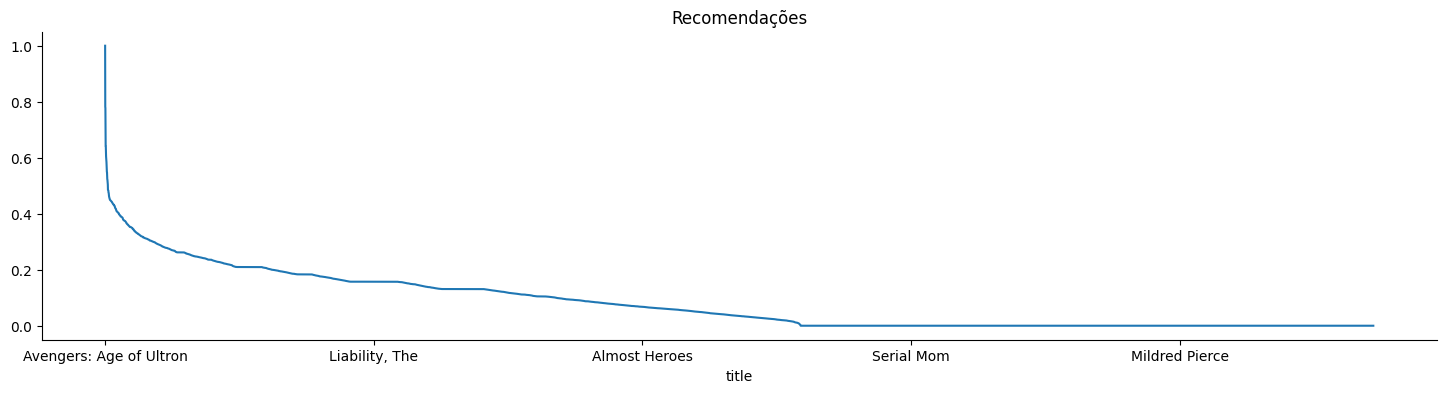

In [13]:
from matplotlib import pyplot as plt
cossine_df['Recomendações'].plot(kind='line', figsize=(18, 4), title='Recomendações')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Content-Based Filtering - Filtragem baseada em conteúdo**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
dados = pd.read_csv('Dados.csv')
tags  = pd.read_csv('Tags.csv')

In [16]:
dados.head()

,Name,Year,Stars,Score,Time,Votes,Total,Tags,Directors_Cast,Discription
0,Pulp Fiction,1994,8.9,94.0,154,"1,871,051",$107.93,\nCrime Drama,Quentin Tarantino John Travolta Uma Thurman Sa...,\nThe lives of two mob hitmen a boxer a gangst...
1,The Amazing Spider-Man 2,2014,6.6,53.0,142,"425,529",$202.85,\nAction Adventure Fantasy,Marc Webb Andrew Garfield Emma Stone Jamie Fox...,\nWhen New York is put under siege by Oscorp i...
2,The Shawshank Redemption,1994,9.3,80.0,142,"2,409,436",$28.34,\nDrama,Frank Darabont Tim Robbins Morgan Freeman Bob ...,\nTwo imprisoned men bond over a number of yea...
3,Star Wars: Episode IV - A New Hope,1977,8.6,90.0,121,"1,255,464",$322.74,\nAction Adventure Fantasy,George Lucas Mark Hamill Harrison Ford Carrie ...,\nLuke Skywalker joins forces with a Jedi Knig...
4,Back to the Future,1985,8.5,87.0,116,"1,087,878",$210.61,\nAdventure Comedy Sci-Fi,Robert Zemeckis Michael J. Fox Christopher Llo...,\nMarty McFly a 17-year-old high school studen...


## Agrupamento das avaliações dos filmes

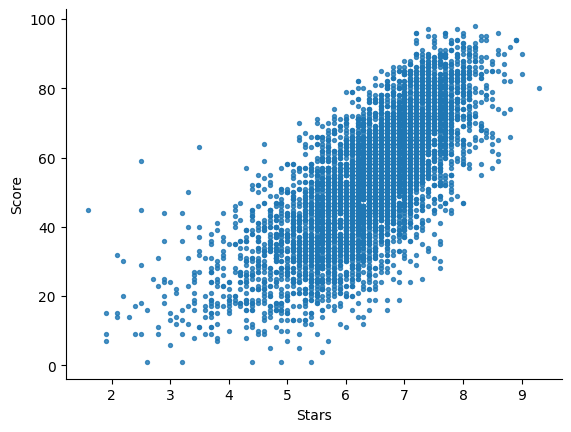

In [17]:
from matplotlib import pyplot as plt
dados.plot(kind='scatter', x='Stars', y='Score', s=8, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
tags.head()

,movieId,tag
0,1,"Owned,imdb top 250,Pixar,Pixar,time travel,chi..."
1,2,"Robin Williams,time travel,fantasy,based on ch..."
2,3,"funny,best friend,duringcreditsstinger,fishing..."
3,4,"based on novel or book,chick flick,divorce,int..."
4,5,"aging,baby,confidence,contraception,daughter,g..."


In [19]:
dados.shape

(9937, 10)

In [20]:
tags.shape

(45256, 2)

In [21]:
filmes['movieId'] = filmes['movieId'].apply(lambda x: str(x))

# **Montando tabela de filmes com suas informações essenciais**

In [22]:
df2 = filmes.merge(dados, left_on='title', right_on='Name', how='left')
df2 = df2.merge(tags, left_on='movieId', right_on='movieId', how='left')
df2['Infos'] = df2['genres'] + str(df2['Directors_Cast']) + str(df2['Discription']) + df2['tag']
df2.head()

,movieId,title,genres,year,Name,Year,Stars,Score,Time,Votes,Total,Tags,Directors_Cast,Discription,tag,Infos
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,1995,8.3,95.0,81,"908,794",$191.80,\nAnimation Adventure Comedy,John Lasseter Tom Hanks Tim Allen Don Rickles ...,\nA cowboy doll is profoundly threatened and j...,"Owned,imdb top 250,Pixar,Pixar,time travel,chi...",Adventure|Animation|Children|Comedy|Fantasy0 ...
1,2,Jumanji,Adventure|Children|Fantasy,1995,Jumanji,1995,7.0,39.0,104,"316,485",$100.48,\nAdventure Comedy Family,Joe Johnston Robin Williams Kirsten Dunst Bonn...,\nWhen two kids find and play a magical board ...,"Robin Williams,time travel,fantasy,based on ch...",Adventure|Children|Fantasy0 John Lasset...
2,3,Grumpier Old Men,Comedy|Romance,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"funny,best friend,duringcreditsstinger,fishing...",Comedy|Romance0 John Lasseter Tom Hanks...
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,Waiting to Exhale,1995,6.0,NaN,124,"9,911",$67.05,\nComedy Drama Romance,Forest Whitaker Whitney Houston Angela Bassett...,NaN,"based on novel or book,chick flick,divorce,int...",Comedy|Drama|Romance0 John Lasseter Tom...
4,5,Father of the Bride Part II,Comedy,1995,Father of the Bride Part II,1995,6.1,49.0,106,"35,472",$76.59,\nComedy Family Romance,Charles Shyer Steve Martin Diane Keaton Martin...,\nGeorge Banks must deal not only with the pre...,"aging,baby,confidence,contraception,daughter,g...",Comedy0 John Lasseter Tom Hanks Tim All...


In [23]:
vec = TfidfVectorizer()
tfidf = vec.fit_transform(df2['Infos'].apply(lambda x: np.str_(x)))

In [24]:
sim = cosine_similarity(tfidf)
sim

array([[1.        , 0.08465854, 0.01312877, ..., 0.01361825, 0.02186222,
        0.01361825],
       [0.08465854, 1.        , 0.02747468, ..., 0.0599022 , 0.0949832 ,
        0.0599022 ],
       [0.01312877, 0.02747468, 1.        , ..., 0.19453706, 0.21472584,
        0.19453706],
       ...,
       [0.01361825, 0.0599022 , 0.19453706, ..., 1.        , 0.68030435,
        1.        ],
       [0.02186222, 0.0949832 , 0.21472584, ..., 0.68030435, 1.        ,
        0.68030435],
       [0.01361825, 0.0599022 , 0.19453706, ..., 1.        , 0.68030435,
        1.        ]])

In [25]:
sim_df2 = pd.DataFrame(sim, columns=df2['title'], index=df2['title'])
sim_df2.head()

title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Heat,Sabrina,Tom and Huck,Sudden Death,...,Gintama: The Movie,anohana: The Flower We Saw That Day - The Movie,Silver Spoon,Love Live! The School Idol Movie,Jon Stewart Has Left the Building,Black Butler: Book of the Atlantic,No Game No Life: Zero,Flint,Bungo Stray Dogs: Dead Apple,Andrew Dice Clay: Dice Rules
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.084659,0.013129,0.016002,0.033845,0.007786,0.007786,0.006416,0.052864,0.007285,...,0.099869,0.013618,0.013618,0.013618,0.013618,0.013618,0.013618,0.013618,0.021862,0.013618
Jumanji,0.084659,1.000000,0.027475,0.151885,0.103882,0.003845,0.003845,0.052921,0.087719,0.041849,...,0.076600,0.059902,0.059902,0.059902,0.059902,0.059902,0.059902,0.059902,0.094983,0.059902
Grumpier Old Men,0.013129,0.027475,1.000000,0.139910,0.196165,0.046368,0.046368,0.043952,0.131067,0.072365,...,0.179095,0.194537,0.194537,0.194537,0.194537,0.194537,0.194537,0.194537,0.214726,0.194537
Waiting to Exhale,0.016002,0.151885,0.139910,1.000000,0.278759,0.019550,0.019550,0.255034,0.314388,0.151062,...,0.373854,0.407665,0.407665,0.407665,0.407665,0.407665,0.407665,0.407665,0.448173,0.407665
Father of the Bride Part II,0.033845,0.103882,0.196165,0.278759,1.000000,0.011208,0.011208,0.081509,0.261189,0.144008,...,0.356444,0.372773,0.372773,0.372773,0.372773,0.372773,0.372773,0.372773,0.427902,0.372773


# **Por similaridade de cosseno, podemos ver as recomendações (Testável)**

In [26]:
final_df = pd.DataFrame(sim_df2['Back to the Future'].sort_values(ascending=False))
final_df.columns = ['Recomendações']
final_df.head(20)

,Recomendações
title,
Back to the Future,1.000000
Back to the Future Part II,0.860040
Back to the Future Part III,0.761418
"Time Machine, The",0.664804
Frequency,0.629356
Peggy Sue Got Married,0.599153
Bill & Ted's Excellent Adventure,0.598600
Somewhere in Time,0.577223
Bill & Ted's Bogus Journey,0.569298


## Filmes que mais se aproximam do resultado de pesquisa com base no rating da recomendação

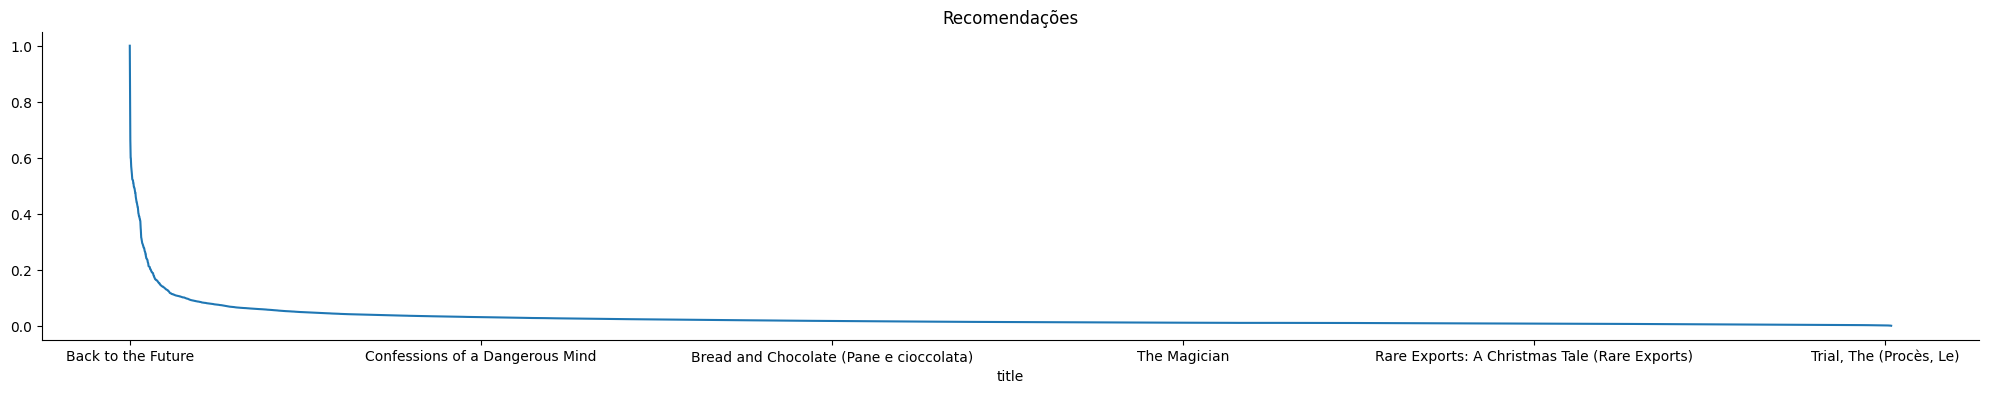

In [27]:
from matplotlib import pyplot as plt
final_df['Recomendações'].plot(kind='line', figsize=(25, 4), title='Recomendações')
plt.gca().spines[['top', 'right']].set_visible(False)

## Gráfico de recomendação com base nos filmes que possuem perfil parecido

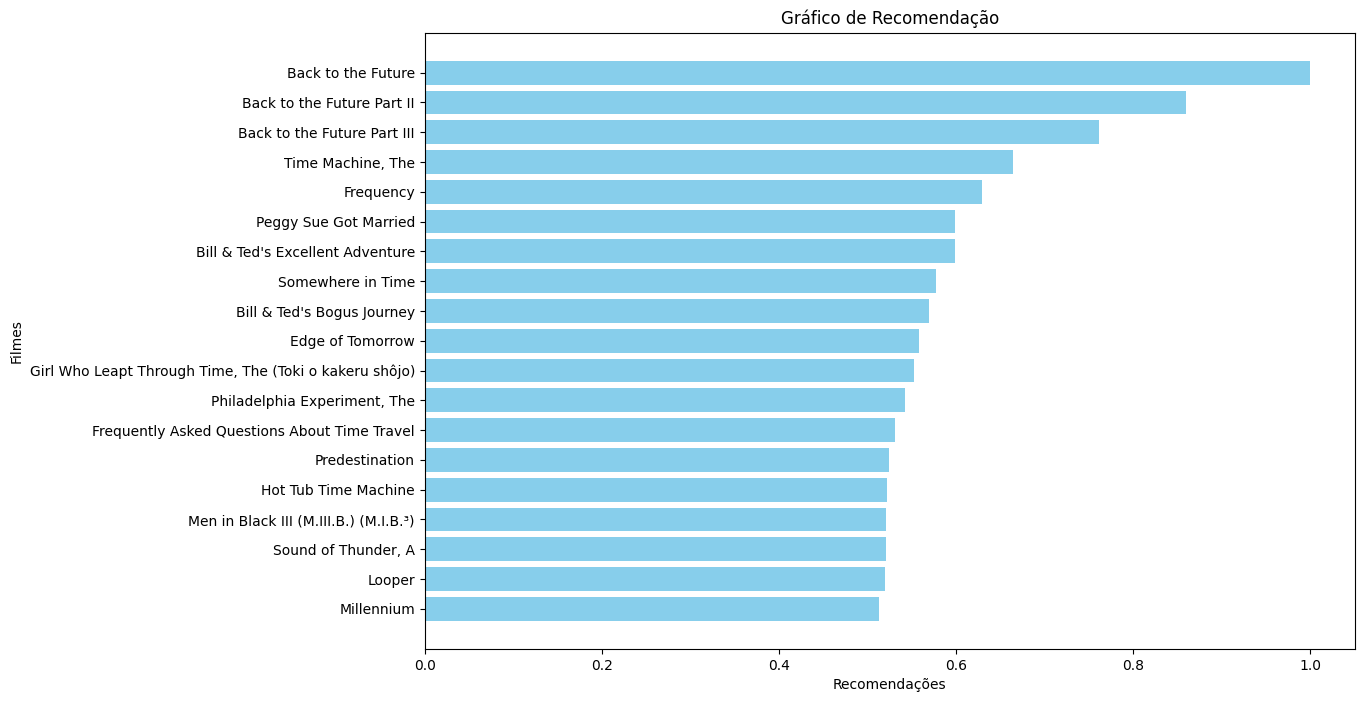

In [28]:
final_df_top20 = final_df.head(20)  # Seleciona apenas os 20 primeiros filmes
plt.figure(figsize=(12, 8))
plt.barh(final_df_top20.index, final_df_top20['Recomendações'], color='skyblue')
plt.xlabel('Recomendações')
plt.ylabel('Filmes')  # Rótulo do eixo vertical
plt.title('Gráfico de Recomendação')
plt.gca().invert_yaxis()  # Inverter a ordem para que a maior recomendação esteja no topo
plt.show()